In [53]:
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn import tree

import seaborn as sns
import matplotlib.pyplot as plt 

import psycopg2

import warnings 
warnings.simplefilter("ignore")

%matplotlib inline

## Connect to SQL Database

In [2]:
def get_db_connection():
    conn = psycopg2.connect(host='localhost',
                            database='Mushroom_Magic',
                            user='postgres',
                            password='postgres')
    return conn

In [3]:
def data():
    conn = get_db_connection()
    cur = conn.cursor()
    cur.execute('SELECT * FROM mushroom_magical_wonderland')
    data = cur.fetchall()
    list =[]
    for row in data:
        # print(row)
        list.append({
            "class" : row[0],
            "cap-shape" :  row[1],
            "cap-surface" :row[2],
            "cap-color": row[3],
            "bruises": row[4],
            "odor":row[5],
            "gill-attachment":row[6],
            "gill-spacing":row[7],
            "gill-size":row[8],
            "gill-color":row[9],
            "stalk-shape":row[10],
            "stalk-root":row[11],
            "stalk-surface-above-ring":row[12],
            "stalk-surface-below-ring":row[13],
            "stalk-color-above-ring":row[14],
            "stalk-color-below-ring":row[15],
            "veil-type":row[16],
            "veil-color":row[17],
            "ring-number":row[18],
            "ring-type":row[19],
            "spore-print-color":row[20],
            "population":row[21],
            "habitat":row[22]

        })
    cur.close()
    conn.close()
    return list


In [4]:
conn = get_db_connection()
cur = conn.cursor()
query = 'SELECT * FROM mushroom_magical_wonderland'


In [5]:
df = pd.read_sql(query, conn)
df = df.drop(columns='veil-type')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no_bruises,none,free,crowded,broad,black,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


In [6]:
y = df['class']
X = df.drop(columns='class')

In [7]:
X[:5]

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,grasses
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,smooth,smooth,white,white,white,one,pendant,brown,numerous,meadows
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,smooth,smooth,white,white,white,one,pendant,black,scattered,urban
4,convex,smooth,gray,no_bruises,none,free,crowded,broad,black,tapering,...,smooth,smooth,white,white,white,one,evanescent,brown,abundant,grasses


In [8]:
y[:5]

0    poisonous
1       edible
2       edible
3    poisonous
4       edible
Name: class, dtype: object

In [9]:
X = pd.get_dummies(X)

In [10]:
X.head()

,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
X_train.shape

(6093, 116)

In [13]:
X_test.shape

(2031, 116)

In [14]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## No. 1 - Fitting the KNeighbors Model

In [15]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
y_pred = model.predict(X_test_scaled)
y_pred

array(['edible', 'poisonous', 'poisonous', ..., 'poisonous', 'poisonous',
       'poisonous'], dtype=object)

In [17]:
confusion_matrix(y_pred,y_test)

array([[1020,    2],
       [   0, 1009]], dtype=int64)

In [47]:
print("Classification Report: KNN Model")
print(classification_report(y_pred,y_test))

Classification Report: KNN Model
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1022
   poisonous       1.00      1.00      1.00      1009

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [19]:
balanced_accuracy_score(y_test, y_pred)

0.9990108803165183

In [20]:
y_pred_train = model.predict(X_train_scaled)
y_pred_train

array(['poisonous', 'edible', 'poisonous', ..., 'poisonous', 'edible',
       'poisonous'], dtype=object)

In [21]:
confusion_matrix(y_pred_train,y_train)

array([[3188,    1],
       [   0, 2904]], dtype=int64)

In [22]:
print("Classification Report: KNN Model")
print(classification_report(y_pred_train,y_train))

Classification Report: KNN Model
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      3189
   poisonous       1.00      1.00      1.00      2904

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093



In [23]:
balanced_accuracy_score(y_train, y_pred_train)

0.999827882960413

## No. 2 - Fitting the Random Forest Model

In [24]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=70)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [25]:
rf_pred = rf_model.predict(X_test_scaled)

In [26]:
cm = confusion_matrix(y_test, rf_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

acc_score = accuracy_score(y_test, rf_pred)

print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report: Random Forest Model")
print(classification_report(y_test, rf_pred))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1020,0
Actual 1,0,1011


Accuracy Score : 1.0
Classification Report: Random Forest Model
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1020
   poisonous       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## No. 3 - Fitting the Decision Tree Model

In [27]:
dt_model = tree.DecisionTreeClassifier()

In [28]:
dt_model = dt_model.fit(X_train_scaled, y_train)

In [29]:
predictions_tree= dt_model.predict(X_test_scaled)

In [30]:
cm_tree= confusion_matrix(y_test, predictions_tree)

In [31]:
cm_tree_df= pd.DataFrame(cm_tree, index=["Actual 0", "Actual 1"], columns= ['Predicted 0', 'Predicted 1'])

dt_acc_score = accuracy_score(y_test, predictions_tree)

In [32]:
print("Confusion Matrix")
display(cm_tree_df)
print(f"Accuracy Score : {dt_acc_score}")
print("Classification Report: Decision Tree Model")
print(classification_report(y_test, predictions_tree))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1020,0
Actual 1,0,1011


Accuracy Score : 1.0
Classification Report: Decision Tree Model
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1020
   poisonous       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## Correlation Matrix - Entire Dataset

In [33]:
df_corr = pd.get_dummies(df)
corr_var = df_corr.corr()
# corr_var.to_csv("Resources/correlation.csv")
corr_var

,class_edible,class_poisonous,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,...,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
class_edible,1.000000,-1.000000,0.182567,-0.023007,0.026886,-0.018526,-0.163565,0.060664,0.195415,-0.023007,...,0.159572,-0.443722,0.107055,0.165004,-0.155150,0.138627,-0.323346,-0.112078,0.150087,0.126123
class_poisonous,-1.000000,1.000000,-0.182567,0.023007,-0.026886,0.018526,0.163565,-0.060664,-0.195415,0.023007,...,-0.159572,0.443722,-0.107055,-0.165004,0.155150,-0.138627,0.323346,0.112078,-0.150087,-0.126123
cap-shape_bell,0.182567,-0.182567,1.000000,-0.005387,-0.219564,-0.193260,-0.081769,-0.015264,-0.091638,0.018820,...,0.158702,-0.168381,-0.120154,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764,-0.182037
cap-shape_conical,-0.023007,0.023007,-0.005387,1.000000,-0.020077,-0.017672,-0.007477,-0.001396,-0.014032,0.249631,...,-0.009456,-0.022075,-0.011469,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453,-0.017653
cap-shape_convex,0.026886,-0.026886,-0.219564,-0.020077,1.000000,-0.720235,-0.304733,-0.056884,0.063511,-0.020077,...,0.059264,-0.060421,0.044626,0.023197,-0.096639,-0.004529,-0.029042,0.002845,-0.036493,0.071773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_meadows,0.138627,-0.138627,0.374316,-0.004286,-0.004529,-0.129312,-0.065047,-0.012142,-0.122077,-0.004286,...,0.152473,-0.144434,-0.099772,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041,-0.153579
habitat_paths,-0.323346,0.323346,-0.095178,-0.008985,-0.029042,0.021891,0.090538,-0.025458,-0.086727,-0.008985,...,-0.125366,0.169228,0.040714,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986,-0.322005
habitat_urban,-0.112078,0.112078,-0.052871,-0.004835,0.002845,0.030636,-0.073380,0.288697,-0.011913,-0.004835,...,0.130450,0.001180,-0.042888,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889,-0.173254
habitat_waste,0.150087,-0.150087,-0.037764,-0.003453,-0.036493,-0.017450,0.119003,-0.009784,-0.098365,-0.003453,...,-0.066282,-0.154742,-0.080392,-0.093276,-0.052553,-0.030041,-0.062986,-0.033889,1.000000,-0.123748


## Feature Importance

In [34]:
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.13012935099570153, 'odor_none'),
 (0.07283162934783789, 'odor_foul'),
 (0.055723874401817634, 'gill-size_narrow'),
 (0.05325061248103122, 'gill-size_broad'),
 (0.0448179124240506, 'stalk-surface-above-ring_silky'),
 (0.04247909420582049, 'gill-color_buff'),
 (0.04204008365464474, 'spore-print-color_chocolate'),
 (0.03787649332020073, 'stalk-surface-below-ring_silky'),
 (0.03672184603776665, 'ring-type_pendant'),
 (0.03159612925685357, 'bruises_bruises'),
 (0.023855666306412192, 'bruises_no_bruises'),
 (0.02113465905263289, 'population_several'),
 (0.020717578378130635, 'gill-spacing_crowded'),
 (0.019196738673851178, 'ring-type_large'),
 (0.01918122215237451, 'stalk-surface-above-ring_smooth'),
 (0.01868070116796564, 'gill-spacing_close'),
 (0.01784803855582144, 'stalk-root_equal'),
 (0.014443275108543747, 'odor_pungent'),
 (0.013819639182641388, 'spore-print-color_white'),
 (0.013734087521415342, 'stalk-root_bulbous'),
 (0.01301766352724735, 'stalk-shape_tapering'),
 (0.0120099929

<Axes: title={'center': 'Top Features Importances'}, ylabel='1'>

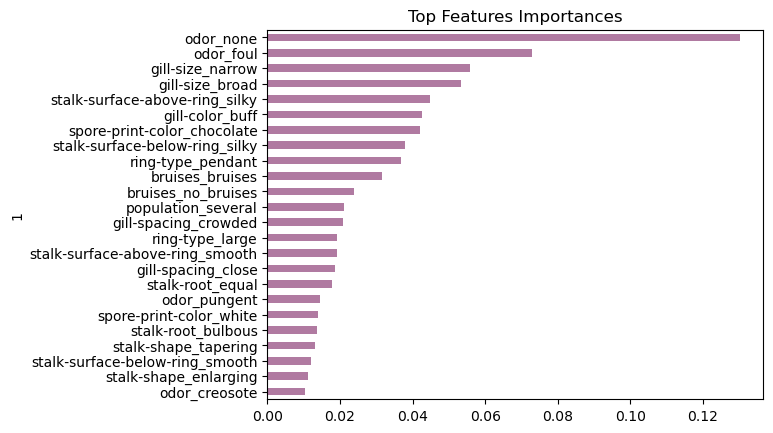

In [35]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature_Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature_Importances')
importances_sorted = importances_sorted.loc[importances_sorted.Feature_Importances>0.01]
importances_sorted.plot(kind='barh', color='#b07aa1', title= 'Top Features Importances', legend=False)

## Filtering Out Top Features to Train Model

In [36]:
imp_feat_df = df[[
    "class", "odor", "gill-size", "gill-color", "stalk-surface-above-ring", "stalk-surface-below-ring", 
    "spore-print-color", "bruises", "gill-spacing", "population", "ring-type"]]
imp_feat_df.head()

,class,odor,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,spore-print-color,bruises,gill-spacing,population,ring-type
0,poisonous,pungent,narrow,black,smooth,smooth,black,bruises,close,scattered,pendant
1,edible,almond,broad,black,smooth,smooth,brown,bruises,close,numerous,pendant
2,edible,anise,broad,brown,smooth,smooth,brown,bruises,close,numerous,pendant
3,poisonous,pungent,narrow,brown,smooth,smooth,black,bruises,close,scattered,pendant
4,edible,none,broad,black,smooth,smooth,brown,no_bruises,crowded,abundant,evanescent


In [37]:
top_y = imp_feat_df['class']
top_X = imp_feat_df.drop(columns='class')
top_X = pd.get_dummies(top_X)

In [38]:
top_X_train, top_X_test, top_y_train, top_y_test = train_test_split(top_X, top_y, random_state=1)

In [39]:
top_X_train.shape

(6093, 55)

In [40]:
top_X_test.shape

(2031, 55)

In [41]:
top_X_scaler = scaler.fit(top_X_train)

top_X_train_scaled = top_X_scaler.transform(top_X_train)
top_X_test_scaled = top_X_scaler.transform(top_X_test)

In [42]:
top_model = tree.DecisionTreeClassifier()
top_model = top_model.fit(top_X_train_scaled, top_y_train)

In [43]:
top_pred_tree = top_model.predict(top_X_test_scaled)

In [44]:
top_cm_tree = confusion_matrix(top_y_test, top_pred_tree)
top_cm_tree_df= pd.DataFrame(top_cm_tree, index=["Actual 0", "Actual 1"], columns= ['Predicted 0', 'Predicted 1'])
top_acc_score = accuracy_score(top_y_test, top_pred_tree)

In [49]:
print("Confusion Matrix")
display(top_cm_tree_df)
print(f"Accuracy Score : {top_acc_score}")
print("Classification Report: Decision Tree Model (Important Features)")
print(classification_report(top_y_test, top_pred_tree))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1020,0
Actual 1,0,1011


Accuracy Score : 1.0
Classification Report: Decision Tree Model (Important Features)
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1020
   poisonous       1.00      1.00      1.00      1011

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## Correlation Matrix - Top Features

In [46]:
imp_corr = pd.get_dummies(imp_feat_df)
corr_var_imp = imp_corr.corr()
#corr_var_imp.to_csv("Resources/correlation_imp_features.csv")
corr_var_imp

,class_edible,class_poisonous,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,...,population_clustered,population_numerous,population_scattered,population_several,population_solitary,ring-type_evanescent,ring-type_flaring,ring-type_large,ring-type_none,ring-type_pendant
class_edible,1.000000,-1.000000,0.219529,0.219529,-0.161278,-0.286360,-0.623842,-0.069159,0.785557,-0.186984,...,0.137645,0.219529,0.159572,-0.443722,0.107055,-0.223286,0.074371,-0.451619,-0.069159,0.540469
class_poisonous,-1.000000,1.000000,-0.219529,-0.219529,0.161278,0.286360,0.623842,0.069159,-0.785557,0.186984,...,-0.137645,-0.219529,-0.159572,0.443722,-0.107055,0.223286,-0.074371,0.451619,0.069159,-0.540469
odor_almond,0.219529,-0.219529,1.000000,-0.051787,-0.035405,-0.062864,-0.136952,-0.015182,-0.199381,-0.041048,...,-0.047561,0.284785,0.180737,-0.171721,-0.050629,-0.163954,-0.017544,-0.099144,-0.015182,0.232895
odor_anise,0.219529,-0.219529,-0.051787,1.000000,-0.035405,-0.062864,-0.136952,-0.015182,-0.199381,-0.041048,...,-0.047561,0.284785,0.180737,-0.171721,-0.050629,-0.163954,-0.017544,-0.099144,-0.015182,0.232895
odor_creosote,-0.161278,0.161278,-0.035405,-0.035405,1.000000,-0.042979,-0.093630,-0.010380,-0.136312,-0.028064,...,-0.032516,-0.035405,0.149454,0.000843,-0.080392,-0.112092,-0.011994,-0.067782,-0.010380,0.159225
odor_fishy,-0.286360,0.286360,-0.062864,-0.062864,-0.042979,1.000000,-0.166247,-0.018430,-0.242030,-0.049829,...,-0.057734,-0.062864,-0.117689,0.277746,-0.142742,0.383426,-0.021297,-0.120351,-0.018430,-0.269925
odor_foul,-0.623842,0.623842,-0.136952,-0.136952,-0.093630,-0.166247,1.000000,-0.040150,-0.527269,-0.108554,...,-0.125776,-0.136952,-0.145122,0.163744,0.131725,-0.095213,-0.046396,0.723932,-0.040150,-0.427514
odor_musty,-0.069159,0.069159,-0.015182,-0.015182,-0.010380,-0.018430,-0.040150,1.000000,-0.058453,-0.012034,...,0.319222,-0.015182,-0.028423,-0.066356,-0.034474,-0.048067,-0.005143,-0.029066,1.000000,-0.065190
odor_none,0.785557,-0.785557,-0.199381,-0.199381,-0.136312,-0.242030,-0.527269,-0.058453,1.000000,-0.158038,...,0.193896,-0.034098,-0.009620,-0.275386,0.136724,-0.082485,0.087993,-0.381707,-0.058453,0.352151
odor_pungent,-0.186984,0.186984,-0.041048,-0.041048,-0.028064,-0.049829,-0.108554,-0.012034,-0.158038,1.000000,...,-0.037699,-0.041048,0.173275,0.000977,-0.093206,-0.129958,-0.013906,-0.078586,-0.012034,0.184603


In [51]:
corr_df_heatmap = df.copy()
for col in corr_df_heatmap.columns:
    corr_df_heatmap[col] = corr_df_heatmap[col].astype('category').cat.codes

corr_df_heatmap.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,2,3,0,0,7,1,0,1,0,...,3,3,7,7,2,1,4,0,3,4
1,0,2,3,9,0,0,1,0,0,0,...,3,3,7,7,2,1,4,1,2,0
2,0,0,3,8,0,1,1,0,0,1,...,3,3,7,7,2,1,4,1,2,2
3,1,2,2,8,0,7,1,0,1,1,...,3,3,7,7,2,1,4,0,3,4
4,0,2,3,3,1,6,1,1,0,0,...,3,3,7,7,2,1,0,1,0,0


Text(0.5, 1.0, 'Correlation Heatmap - Features')

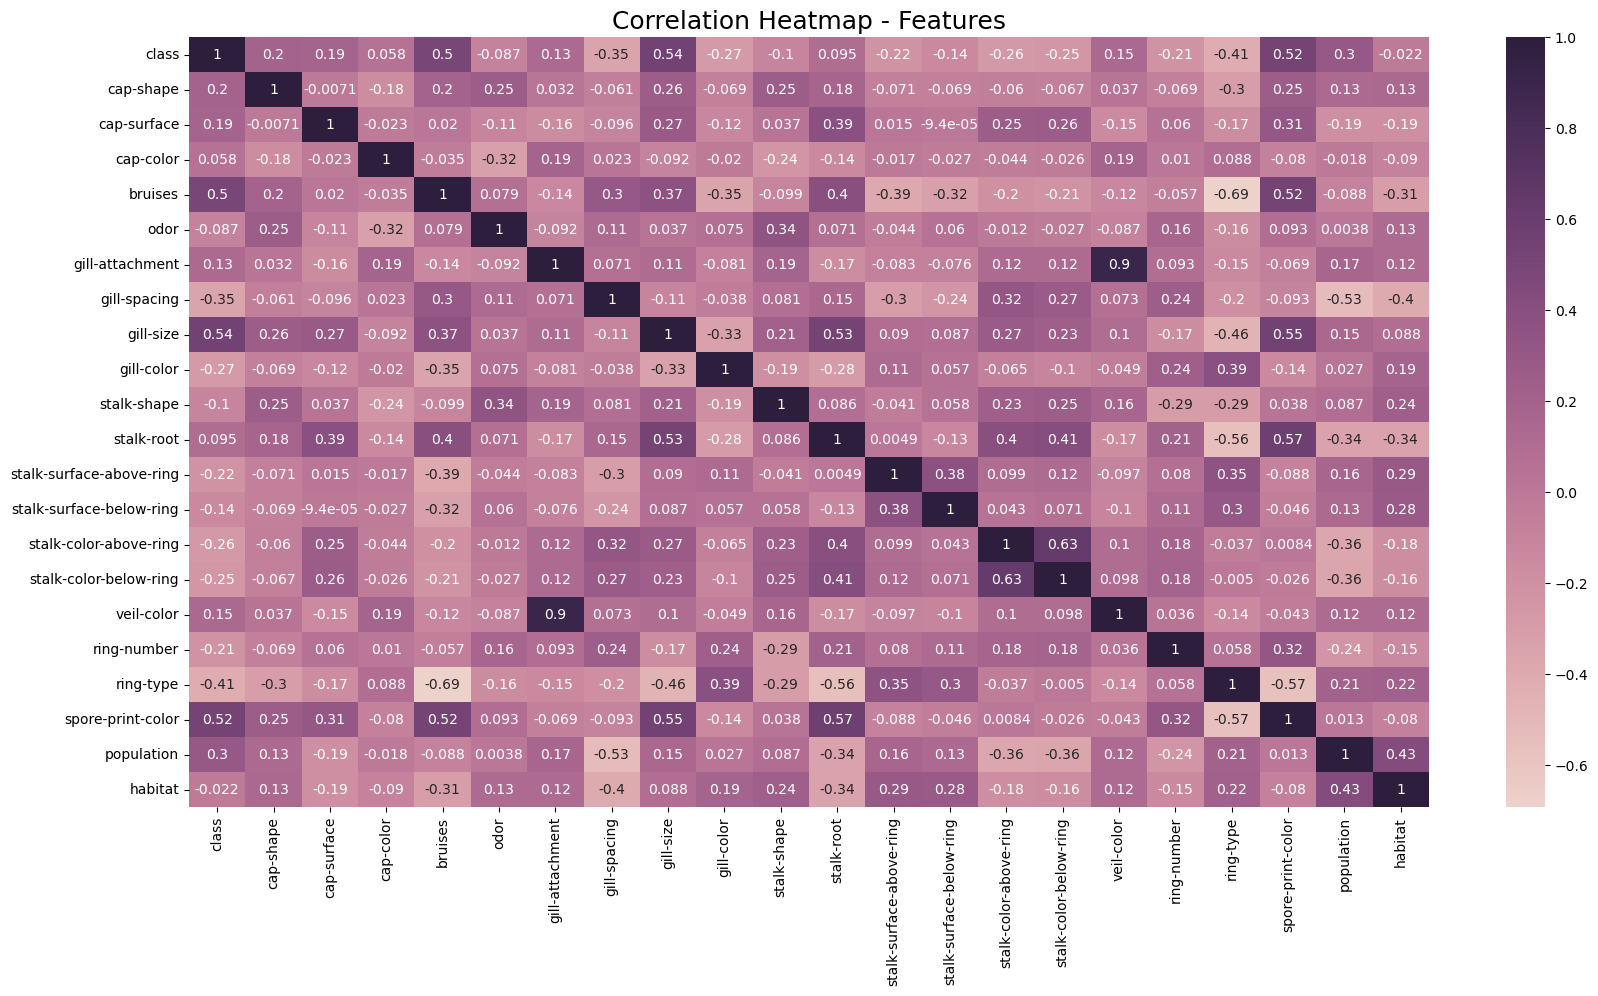

In [62]:
plt.figure(figsize=(20,10))
heatmap = sns.heatmap(corr_df_heatmap.corr(), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
heatmap.set_title("Correlation Heatmap - Features", fontdict={'fontsize':18})